# 📊 Trader Behavior vs Market Sentiment Analysis

#### Step 1. Load Dataset

In [3]:
import pandas as pd
df1 = pd.read_csv('fear_greed_index.csv')
df1.head()



,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
df2 =pd.read_csv('historical_data.csv')
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


#### Step 2. Data Cleaning

In [5]:
df1.isna().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [6]:
print(df1.columns)
print(df2.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [7]:
df1['date']=pd.to_datetime(df1['date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [8]:
df1['timestamp']=pd.to_datetime(df1['timestamp'])
df1.head()

,timestamp,value,classification,date
0,1970-01-01 00:00:01.517463000,30,Fear,2018-02-01
1,1970-01-01 00:00:01.517549400,15,Extreme Fear,2018-02-02
2,1970-01-01 00:00:01.517635800,40,Fear,2018-02-03
3,1970-01-01 00:00:01.517722200,24,Extreme Fear,2018-02-04
4,1970-01-01 00:00:01.517808600,11,Extreme Fear,2018-02-05


In [9]:
df1['timestamp']=pd.to_datetime(df1['timestamp']).dt.date
df2['Timestamp']=pd.to_datetime(df2['Timestamp']).dt.date
is_exit= df1['timestamp'].isin(df2['Timestamp'])
is_exit.unique()

array([ True])

In [10]:
df1['classification'].unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [11]:
df1['classification']=df1['classification'].map({'Extreme Fear':-2,'Fear':-1,'Neutral':0,'Greed':1,'Extreme Greed':2})

**Handling Historical_data**

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9322 entries, 0 to 9321
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           9322 non-null   object 
 1   Coin              9322 non-null   object 
 2   Execution Price   9322 non-null   float64
 3   Size Tokens       9322 non-null   float64
 4   Size USD          9322 non-null   float64
 5   Side              9322 non-null   object 
 6   Timestamp IST     9322 non-null   object 
 7   Start Position    9321 non-null   float64
 8   Direction         9321 non-null   object 
 9   Closed PnL        9321 non-null   float64
 10  Transaction Hash  9321 non-null   object 
 11  Order ID          9321 non-null   float64
 12  Crossed           9321 non-null   object 
 13  Fee               9321 non-null   float64
 14  Trade ID          9321 non-null   float64
 15  Timestamp         9321 non-null   object 
dtypes: float64(8), object(8)
memory usage: 1.1

In [13]:
df2['Timestamp IST'] = pd.to_datetime(
    df2['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)


In [14]:
df2['Timestamp IST'] = pd.to_datetime(
    df2['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
)
df2[0:2]


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1970-01-01
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1970-01-01


In [15]:
df2['Timestamp IST'] =pd.to_datetime(df2['Timestamp IST'])
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1970-01-01
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1970-01-01
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1970-01-01
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1970-01-01
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1970-01-01


In [16]:
df2['Timestamp IST']=pd.to_datetime(df2['Timestamp IST']).dt.date
df2['Timestamp IST'].unique()

array([datetime.date(2024, 12, 2), datetime.date(2024, 12, 3),
       datetime.date(2024, 12, 4), datetime.date(2025, 3, 4),
       datetime.date(2025, 3, 5), datetime.date(2025, 3, 11),
       datetime.date(2025, 3, 18), datetime.date(2025, 4, 8),
       datetime.date(2025, 4, 9), datetime.date(2025, 4, 10),
       datetime.date(2025, 4, 12), datetime.date(2025, 4, 21),
       datetime.date(2025, 4, 23), datetime.date(2025, 4, 24),
       datetime.date(2025, 4, 25), datetime.date(2024, 9, 20),
       datetime.date(2024, 9, 24), datetime.date(2024, 9, 25),
       datetime.date(2024, 9, 26), datetime.date(2024, 9, 27),
       datetime.date(2024, 9, 28), datetime.date(2024, 9, 30),
       datetime.date(2024, 10, 25), datetime.date(2024, 10, 26),
       datetime.date(2024, 11, 29), datetime.date(2024, 12, 12),
       datetime.date(2024, 12, 13), datetime.date(2024, 12, 14),
       datetime.date(2024, 12, 15), datetime.date(2024, 12, 16),
       datetime.date(2024, 12, 17), datetime.date(2

In [17]:
df1['date']=pd.to_datetime(df1['date']).dt.date
df1['date'].unique()

array([datetime.date(2018, 2, 1), datetime.date(2018, 2, 2),
       datetime.date(2018, 2, 3), ..., datetime.date(2025, 4, 30),
       datetime.date(2025, 5, 1), datetime.date(2025, 5, 2)], dtype=object)

In [18]:
df2.rename(columns={'Timestamp IST':'date'},inplace=True)
df2['date']

,date
0,2024-12-02
1,2024-12-02
2,2024-12-02
3,2024-12-02
4,2024-12-02
...,...
9317,2025-04-21
9318,2025-04-21
9319,2025-04-21
9320,2025-04-21


#### Step 3. Merge Trader Data with Market Sentiment

In [19]:
merged_df = pd.merge(df1,df2, on='date', how='inner')
merged_df

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,1970-01-01,54,0,2024-09-20,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,3.28000,711.15,2332.57,SELL,0.00,Open Short,0.000000,0xa9cc1d354fa656c47c2d041249d56a01dc0050b53eba...,3.808060e+10,False,0.223926,7.220000e+14,1970-01-01
1,1970-01-01,54,0,2024-09-20,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,3.78400,3871.46,14649.60,SELL,-711.15,Open Short,0.000000,0x45fcaa5a6b0025f0120e04124d5115015700b0164b79...,3.850491e+10,False,1.406361,4.990000e+14,1970-01-01
2,1970-01-01,54,0,2024-09-20,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,3.88600,10.85,42.16,SELL,-4582.61,Open Short,0.000000,0x12f6a52aac6d614d17ce04124d51e8010100bee1ad10...,3.850500e+10,False,0.004047,1.060000e+15,1970-01-01
3,1970-01-01,54,0,2024-09-20,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,3.88600,2902.07,11277.44,SELL,-4593.46,Open Short,0.000000,0x59ea44dc5847e5d67a4a04124d5296013400631eda8b...,3.850500e+10,False,1.082634,9.420000e+14,1970-01-01
4,1970-01-01,54,0,2024-09-24,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,3.88600,1573.23,6113.57,SELL,-7495.53,Open Short,0.000000,0x3a3990ea13a3a59dd29604129f358c016d005ab783bd...,3.850500e+10,False,0.586902,6.090000e+13,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9310,1970-01-01,60,1,2025-04-25,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AIXBT,0.12363,40428.00,4998.11,SELL,86096.00,Close Long,498.153816,0xc0f9d944feb2754dd58b042235fa7802018d00d56268...,8.878166e+10,True,1.679365,5.610000e+14,1970-01-01
9311,1970-01-01,60,1,2025-04-25,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AIXBT,0.12361,1926.00,238.07,SELL,45668.00,Close Long,23.693652,0xc0f9d944feb2754dd58b042235fa7802018d00d56268...,8.878166e+10,True,0.079992,2.220000e+14,1970-01-01
9312,1970-01-01,60,1,2025-04-25,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AIXBT,0.12360,2409.00,297.75,SELL,43742.00,Close Long,29.611428,0xc0f9d944feb2754dd58b042235fa7802018d00d56268...,8.878166e+10,True,0.100044,4.900000e+14,1970-01-01
9313,1970-01-01,60,1,2025-04-25,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AIXBT,0.12359,6078.00,751.18,SELL,41333.00,Close Long,74.649996,0xc0f9d944feb2754dd58b042235fa7802018d00d56268...,8.878166e+10,True,0.252396,6.480000e+14,1970-01-01


In [20]:
merged_df.isna().sum()

,0
timestamp,0
value,0
classification,0
date,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0


In [21]:
merged_df.nunique()

,0
timestamp,1
value,52
classification,5
date,92
Account,3
Coin,29
Execution Price,2170
Size Tokens,4718
Size USD,6613
Side,2


In [22]:
merged_df[0:2]

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,1970-01-01,54,0,2024-09-20,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,3.280,711.15,2332.57,SELL,0.00,Open Short,0.0,0xa9cc1d354fa656c47c2d041249d56a01dc0050b53eba...,3.808060e+10,False,0.223926,7.220000e+14,1970-01-01
1,1970-01-01,54,0,2024-09-20,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,3.784,3871.46,14649.60,SELL,-711.15,Open Short,0.0,0x45fcaa5a6b0025f0120e04124d5115015700b0164b79...,3.850491e+10,False,1.406361,4.990000e+14,1970-01-01


#### Step 4. Profit Distribution by Market Sentiment

In [23]:
merged_df['profit'] = merged_df['Closed PnL'].apply(lambda x: abs(x) if x > 0 else 0)

In [24]:
import matplotlib.pyplot as plt

data = [
    merged_df[merged_df['classification'] == c]['profit']
    for c in sorted(merged_df['classification'].unique())
]


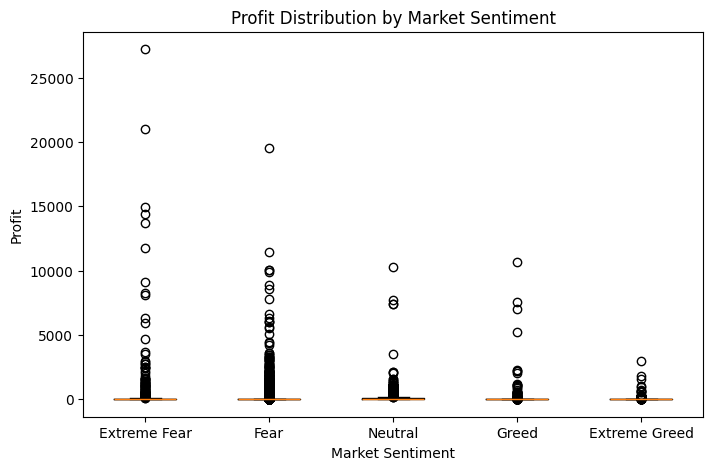

In [25]:
plt.figure(figsize=(8,5))
plt.boxplot(data)

labels = ['Extreme Fear','Fear', 'Neutral', 'Greed', 'Extreme Greed']
plt.xticks(range(1, len(labels)+1), labels)

plt.xlabel('Market Sentiment')
plt.ylabel('Profit')
plt.title('Profit Distribution by Market Sentiment')
plt.show()


#### Step 5. Loss Distribution by Market Sentiment

In [26]:
merged_df[0:2]

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,profit
0,1970-01-01,54,0,2024-09-20,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,3.280,711.15,2332.57,SELL,0.00,Open Short,0.0,0xa9cc1d354fa656c47c2d041249d56a01dc0050b53eba...,3.808060e+10,False,0.223926,7.220000e+14,1970-01-01,0.0
1,1970-01-01,54,0,2024-09-20,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,3.784,3871.46,14649.60,SELL,-711.15,Open Short,0.0,0x45fcaa5a6b0025f0120e04124d5115015700b0164b79...,3.850491e+10,False,1.406361,4.990000e+14,1970-01-01,0.0


In [27]:
merged_df['loss_amount'] = merged_df['Closed PnL'].apply(lambda x: abs(x) if x < 0 else 0)



Text(0.5, 1.0, 'Loss Distribution by Market Sentiment')

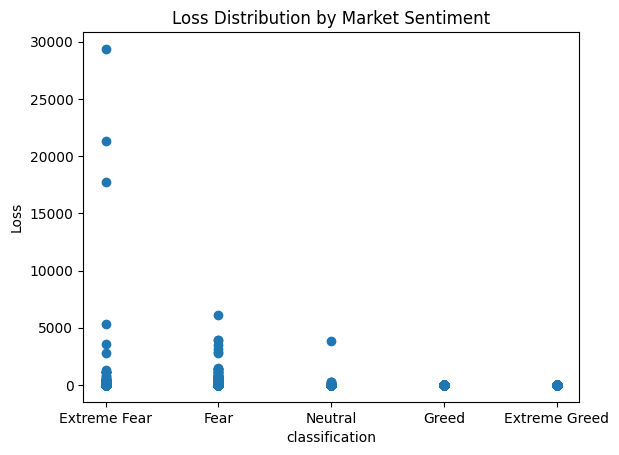

In [28]:
plt.scatter(merged_df['classification'],merged_df['loss_amount'])
labels = ['Extreme Fear','Fear', 'Neutral', 'Greed', 'Extreme Greed']
plt.xticks([-2,-1,0,1,2], labels)
plt.xlabel('classification')
plt.ylabel('Loss')
plt.title('Loss Distribution by Market Sentiment')

#### Step 6. Classification vs Trade

In [29]:
merged_df[0:2]

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,...,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,profit,loss_amount
0,1970-01-01,54,0,2024-09-20,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,3.280,711.15,2332.57,SELL,...,Open Short,0.0,0xa9cc1d354fa656c47c2d041249d56a01dc0050b53eba...,3.808060e+10,False,0.223926,7.220000e+14,1970-01-01,0.0,0.0
1,1970-01-01,54,0,2024-09-20,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,3.784,3871.46,14649.60,SELL,...,Open Short,0.0,0x45fcaa5a6b0025f0120e04124d5115015700b0164b79...,3.850491e+10,False,1.406361,4.990000e+14,1970-01-01,0.0,0.0


In [30]:
merged_df.columns

Index(['timestamp', 'value', 'classification', 'date', 'Account', 'Coin',
       'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Start Position',
       'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed',
       'Fee', 'Trade ID', 'Timestamp', 'profit', 'loss_amount'],
      dtype='object')

In [31]:
merged_df['trade_volume']=merged_df['Execution Price']*merged_df['Size USD']

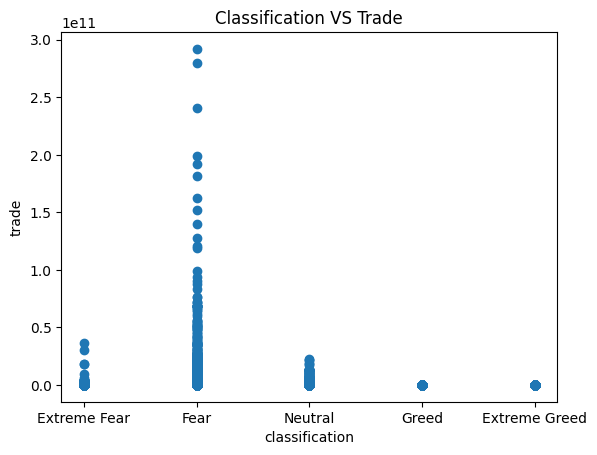

In [32]:
plt.scatter(merged_df['classification'],merged_df['trade_volume'])
plt.xticks([-2,-1,0,1,2],labels)
plt.xlabel('classification')
plt.ylabel('trade')
plt.title("Classification VS Trade")
plt.show()


#### Step 7. Classification vs Leverage

In [33]:
merged_df['leverage']=merged_df['Size USD']/merged_df['Execution Price']
merged_df['leverage']

,leverage
0,711.149390
1,3871.458774
2,10.849202
3,2902.068966
4,1573.229542
...,...
9310,40427.970557
9311,1925.976863
9312,2408.980583
9313,6077.999838


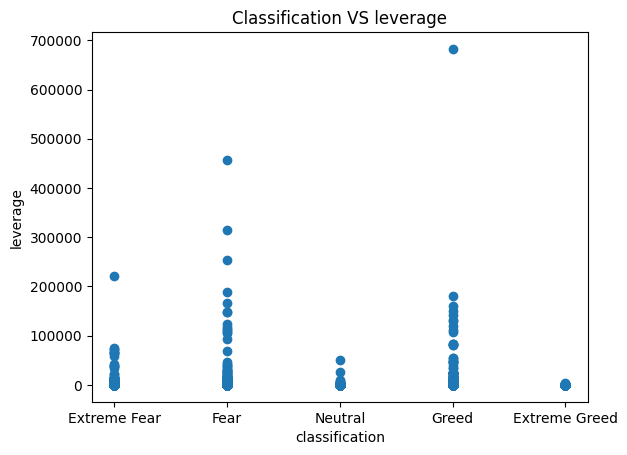

In [34]:
plt.scatter(merged_df['classification'],merged_df['leverage'])
plt.xticks([-2,-1,0,1,2],labels)
plt.xlabel('classification')
plt.ylabel('leverage')
plt.title("Classification VS leverage")
plt.show()